In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\Chaithra M\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the CSV files
train_data = pd.read_csv(r"C:\Users\Chaithra M\Downloads\mnist_train\mnist_train.csv")
test_data = pd.read_csv(r"C:\Users\Chaithra M\Downloads\mnist_test\mnist_test.csv")

# Separate features and labels
x_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
x_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

In [3]:
# Reshape the data to its original shape (28x28) if needed (e.g., for convolutional neural networks)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Normalize the pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [5]:
# Define the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,        # Randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,           # Randomly zoom images
    width_shift_range=0.1,    # Randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,   # Randomly shift images vertically (fraction of total height)
    shear_range=0.1,          # Randomly shear images
    fill_mode='nearest'       # Fill mode for points outside the input boundaries
)

# Fit the data generator on the training data
datagen.fit(x_train)

In [6]:
# Generate augmented images for each image in the training dataset
augmented_images = []
augmented_labels = []

for i in range(len(x_train)):
    x = x_train[i].reshape((1, 28, 28, 1))
    y = y_train[i].reshape((1, -1))
    it = datagen.flow(x, y, batch_size=1)
    for _ in range(5):  # Generate 5 augmented images per original image
        batch = next(it)
        augmented_images.append(batch[0].reshape(28, 28, 1))
        augmented_labels.append(batch[1].reshape(-1))

# Combine original and augmented data
x_train_augmented = np.concatenate((x_train, augmented_images))
y_train_augmented = np.concatenate((y_train, augmented_labels))

In [7]:
# Define the CNN model
model2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

C:\Users\Chaithra M\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Train the model using the augmented data
history = model2.fit(x_train_augmented, y_train_augmented, epochs=5, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/5
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.8810 - loss: 0.3892 - val_accuracy: 0.9853 - val_loss: 0.0484
Epoch 2/5
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.9787 - loss: 0.0685 - val_accuracy: 0.9868 - val_loss: 0.0445
Epoch 3/5
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9865 - loss: 0.0426 - val_accuracy: 0.9892 - val_loss: 0.0383
Epoch 4/5
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.9909 - loss: 0.0296 - val_accuracy: 0.9904 - val_loss: 0.0327
Epoch 5/5
1969/1969 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9933 - loss: 0.0214 - val_accuracy: 0.9890 - val_loss: 0.0414


In [10]:
# Evaluate the model on the test set
test_loss, test_accuracy = model2.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9872 - loss: 0.0406
Test accuracy: 98.97%


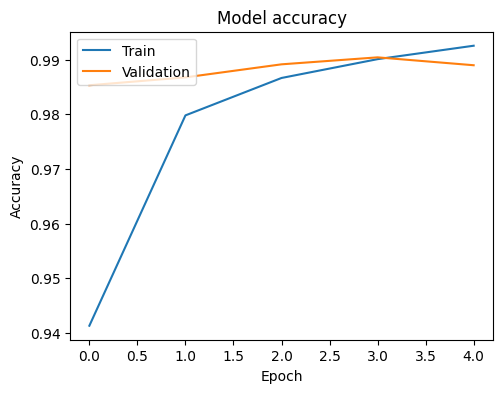

In [11]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

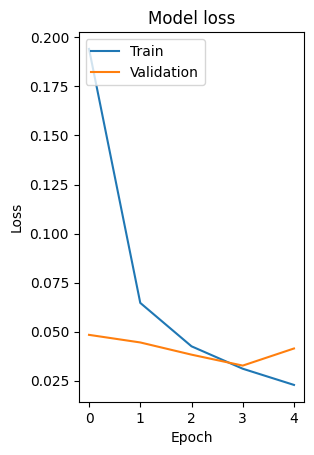

In [12]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [13]:
# Save the trained model
model2.save('cnn_model_with_augmentation.h5')